In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
flower = load_iris()

# 1.) Creating DataFrame

In [3]:
dir(flower)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
flower.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [36]:
df = pd.DataFrame(flower.data, columns = flower.feature_names)

In [37]:
flowertype = pd.DataFrame(flower.target, columns = ['flower'])

In [38]:
def flowernames(series):
    if series == 0:
        return 'setosa'
    elif series == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [39]:
flowertype['flower_name'] = flowertype['flower'].apply(lambda x: flowernames(x))

In [41]:
data = pd.concat((df,flowertype), axis = 1)

# 2.) Assesing DataFrame and visualizing Data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   flower             150 non-null    int32  
 5   flower_name        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


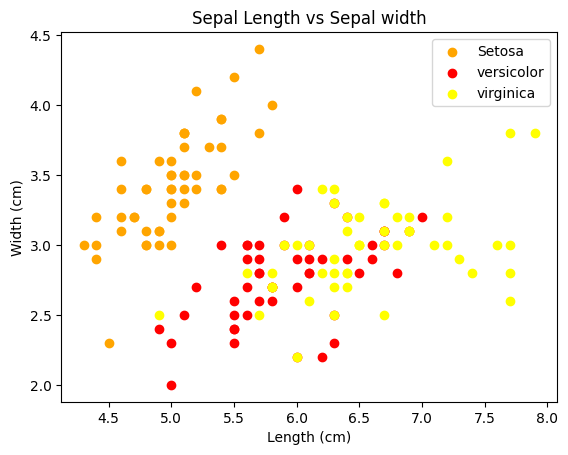

In [85]:
plt.scatter(x = data.loc[data['flower'] == 0, 'sepal length (cm)'], 
            y = data.loc[data['flower'] == 0, 'sepal width (cm)'],
            label = 'Setosa', color = 'orange')
plt.scatter(x = data.loc[data['flower'] == 1, 'sepal length (cm)'], 
            y = data.loc[data['flower'] == 1, 'sepal width (cm)'],
            label = 'versicolor', color = 'red')
plt.scatter(x = data.loc[data['flower'] == 2, 'sepal length (cm)'], 
            y = data.loc[data['flower'] == 2, 'sepal width (cm)'],
            label = 'virginica', color = 'yellow')
plt.title('Sepal Length vs Sepal width')
plt.xlabel('Length (cm)')
plt.ylabel('Width (cm)')
plt.legend()
plt.show()

#### •Since the 2d representation does not give much idea as to how to classify these values, we need to extrude the data into 3rd dimension for better encompassing the dynamics between the features.

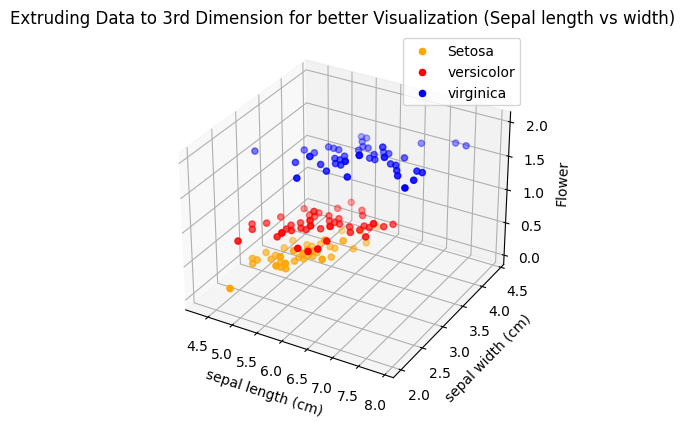

In [71]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = data.loc[data['flower'] == 0, 'sepal length (cm)'], 
            ys = data.loc[data['flower'] == 0, 'sepal width (cm)'],
           zs = data.loc[data['flower'] == 0, 'flower'],
            label = 'Setosa', color = 'orange', zdir = 'z')
ax.scatter(xs = data.loc[data['flower'] == 1, 'sepal length (cm)'], 
            ys = data.loc[data['flower'] == 1, 'sepal width (cm)'],
           zs = data.loc[data['flower'] == 1, 'flower'],
            label = 'versicolor', color = 'red', zdir = 'z' )
ax.scatter(xs = data.loc[data['flower'] == 2, 'sepal length (cm)'], 
            ys = data.loc[data['flower'] == 2, 'sepal width (cm)'],
           zs = data.loc[data['flower'] == 2, 'flower'],
            label = 'virginica', color = 'blue', zdir = 'z')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('Flower')
ax.legend()
plt.title('Extruding Data to 3rd Dimension for better Visualization (Sepal length vs width)')
plt.show()

In [77]:
data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_name
15,5.7,4.4,1.5,0.4,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
101,5.8,2.7,5.1,1.9,2,virginica
39,5.1,3.4,1.5,0.2,0,setosa
36,5.5,3.5,1.3,0.2,0,setosa
130,7.4,2.8,6.1,1.9,2,virginica
134,6.1,2.6,5.6,1.4,2,virginica
117,7.7,3.8,6.7,2.2,2,virginica


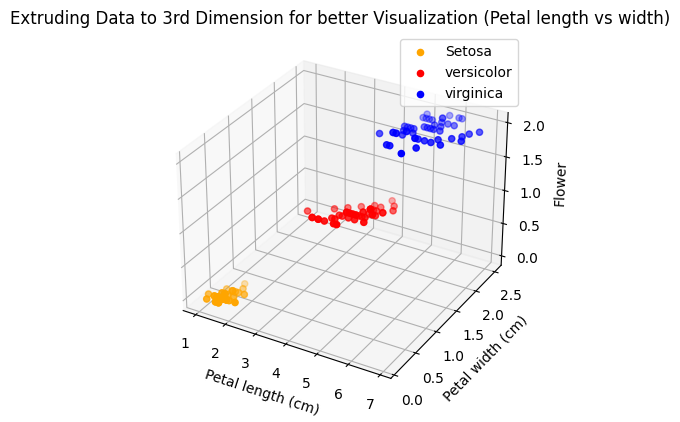

In [80]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs = data.loc[data['flower'] == 0, 'petal length (cm)'], 
            ys = data.loc[data['flower'] == 0, 'petal width (cm)'],
           zs = data.loc[data['flower'] == 0, 'flower'],
            label = 'Setosa', color = 'orange', zdir = 'z')
ax.scatter(xs = data.loc[data['flower'] == 1, 'petal length (cm)'], 
            ys = data.loc[data['flower'] == 1, 'petal width (cm)'],
           zs = data.loc[data['flower'] == 1, 'flower'],
            label = 'versicolor', color = 'red', zdir = 'z' )
ax.scatter(xs = data.loc[data['flower'] == 2, 'petal length (cm)'], 
            ys = data.loc[data['flower'] == 2, 'petal width (cm)'],
           zs = data.loc[data['flower'] == 2, 'flower'],
            label = 'virginica', color = 'blue', zdir = 'z')
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
ax.set_zlabel('Flower')
ax.legend()
plt.title('Extruding Data to 3rd Dimension for better Visualization (Petal length vs width)')
plt.show()

### Dropping the flower_name column because we already have categorical encoding for flower types.

In [87]:
data.drop('flower_name', axis = 1, inplace = True)

### 'flower' is our Target variable therefore we must drop it before any model training, to prevent data leakage. Whilst also saving the Target Variable

In [89]:
y = data.flower

In [91]:
data.drop('flower', axis = 1, inplace = True)

In [95]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# 3.) Training Machine Learning Model

#### Splitting data

In [96]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

#### training

In [99]:
model1 = LogisticRegression()

In [100]:
model1.fit(X_train, y_train)

LogisticRegression()

In [103]:
model1.score(X_test, y_test) * 100

96.66666666666667

In [104]:
y_pred = model1.predict(X_test)

### Note: 0 = Setose, 1 = Versicolor, 2 = Virginica

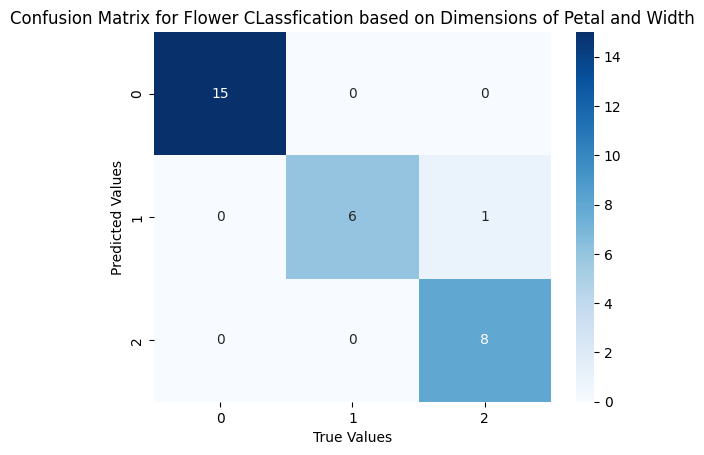

In [112]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Blues', annot = True)
plt.title('Confusion Matrix for Flower CLassfication based on Dimensions of Petal and Width')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [113]:
data.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8


In [126]:
data[123:124]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8


In [114]:
y[123]

2

In [127]:
model1.predict(data[123:124])

array([2])